In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_data = pd.merge(city_data, ride_data, how='outer', on='city')

#combined_data.to_csv("../Pyber/data/combined_data.csv")

# Display the data table for preview

combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
#Determine the City Type
city_types = city_data.set_index(['city'])['type']

#Calculate the total driver count
drivers_city = city_data.groupby(['city']).sum()['driver_count']

#Calculate the total number of rides per city
rides_city = combined_data["city"].value_counts()

#Calculate the total fares per city
fares_city = combined_data.groupby(['city']).sum()['fare']

#Calculate the average fares per city
avg_fares_city = round(fares_city / rides_city, 2)

ride_sharing_table = pd.DataFrame({'Type': city_types,
                                    'Total Drivers per City': drivers_city, 
                                    'Total Rides per City': rides_city,
                                    'Total Fares per City': fares_city,
                                    'Avg Fares per City': avg_fares_city})

ride_sharing_table['Total Fares per City'] = ride_sharing_table['Total Fares per City'].map("${:,.2f}".format)
ride_sharing_table['Avg Fares per City'] = ride_sharing_table['Avg Fares per City'].map("${:,.2f}".format)

#ride_sharing_table.to_csv('data/ride_sharing_table.csv')

ride_sharing_table.head()

,Type,Total Drivers per City,Total Rides per City,Total Fares per City,Avg Fares per City
Amandaburgh,Urban,12,18,$443.55,$24.64
Barajasview,Urban,26,22,$557.31,$25.33
Barronchester,Suburban,11,16,$582.76,$36.42
Bethanyland,Suburban,22,18,$593.21,$32.96
Bradshawfurt,Rural,7,10,$400.64,$40.06


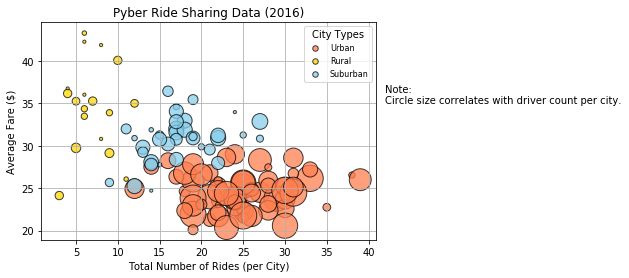

In [3]:
# Obtain the x and y coordinates for each of the three city types
urban_type = combined_data[combined_data['type']=='Urban'].groupby([combined_data['city']])
rural_type = combined_data[combined_data['type']=='Rural'].groupby([combined_data['city']])
suburban_type = combined_data[combined_data['type']=='Suburban'].groupby([combined_data['city']])

#Urban calculations of ride count(x), fare average(y), driver count average(s)
x_urban = urban_type['ride_id'].count()
y_urban = urban_type['fare'].mean()
s_urban = urban_type['driver_count'].mean()

#Rural calculations of ride count(x), fare average(y), driver count average(s)
x_rural = rural_type['ride_id'].count()
y_rural = rural_type['fare'].mean()
s_rural = rural_type['driver_count'].mean()

#Suburban calculations of ride count(x), fare average(y), driver count average(s)
x_suburban = suburban_type['ride_id'].count()
y_suburban = suburban_type['fare'].mean()
s_suburban = suburban_type['driver_count'].mean()

#Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label='Urban', s=s_urban*10, color=['coral'], edgecolor='black', alpha=.75, marker='o')
plt.scatter(x_rural, y_rural, label='Rural', s=s_rural*10, color=['gold'], edgecolor='black', alpha=.75, marker='o')
plt.scatter(x_suburban, y_suburban, label='Suburban', s=s_suburban*10, color=['skyblue'], edgecolor='black', alpha=.75, marker='o')

#Incorporate the other graph properties
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

#Create a legend
legend = plt.legend(fontsize=8, title='City Types', loc='best')

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#Incorporate a text label regarding circle size
plt.text(42,35, 'Note:  \nCircle size correlates with driver count per city.', fontsize=10)


plt.grid()

#Save Figure
plt.savefig('../Pyber/Images/RideSharingDataPlot.png', bbox_inches='tight')

## Total Fares by City Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


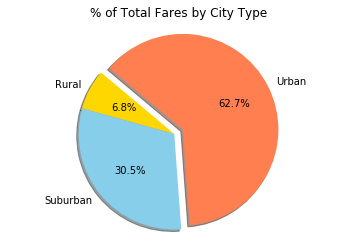

In [4]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

fares_data = combined_data.groupby('type')

fares_total_type = fares_data.sum()['fare']
print(fares_total_type)

type = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'skyblue', 'coral']
explode = (0, 0, 0.1)

plt.pie(fares_total_type, explode=explode, labels=type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('% of Total Fares by City Type')

plt.axis('equal')

plt.savefig('../Pyber/Images/TotalFaresPie.png')
    
plt.show()

## Total Rides by City Type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


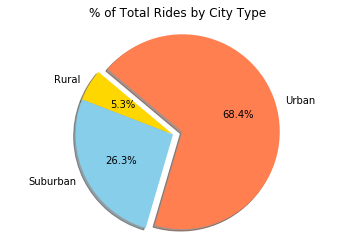

In [5]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

rides_data = combined_data.groupby('type')

rides_total_type = rides_data.count()['ride_id']
print(rides_total_type)

type = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'skyblue', 'coral']
explode = (0, 0, 0.1)

plt.pie(rides_total_type, explode=explode, labels=type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')

plt.axis('equal')

plt.savefig('../Pyber/Images/TotalRidesPie.png')
    
plt.show()


## Total Drivers by City Type

78
490
2405


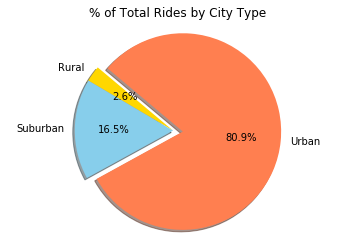

In [6]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

driver_total_count = city_data['driver_count'].sum()
#print(driver_total_count)

driver_count_rural = city_data.loc[city_data['type']=='Rural']['driver_count'].sum()
print(driver_count_rural)

driver_count_suburban = city_data.loc[city_data['type']=='Suburban']['driver_count'].sum()
print(driver_count_suburban)

driver_count_urban = city_data.loc[city_data['type']=='Urban']['driver_count'].sum()
print(driver_count_urban)

type = ['Rural', 'Suburban', 'Urban']
drivers_total = [driver_count_rural, driver_count_suburban, driver_count_urban]
colors = ['gold', 'skyblue', 'coral']
explode = (0, 0, 0.1)

plt.pie(drivers_total, explode=explode, labels=type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('% of Total Rides by City Type')

plt.axis('equal')

plt.savefig('../Pyber/Images/TotalDriversPie.png')
    
plt.show()